# CDA 가설 검정

# 데이터 불러오기

In [1]:
import pandas as pd
data = pd.read_csv("data/cda_sample_data.csv")
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


# 1. 정규성 검정

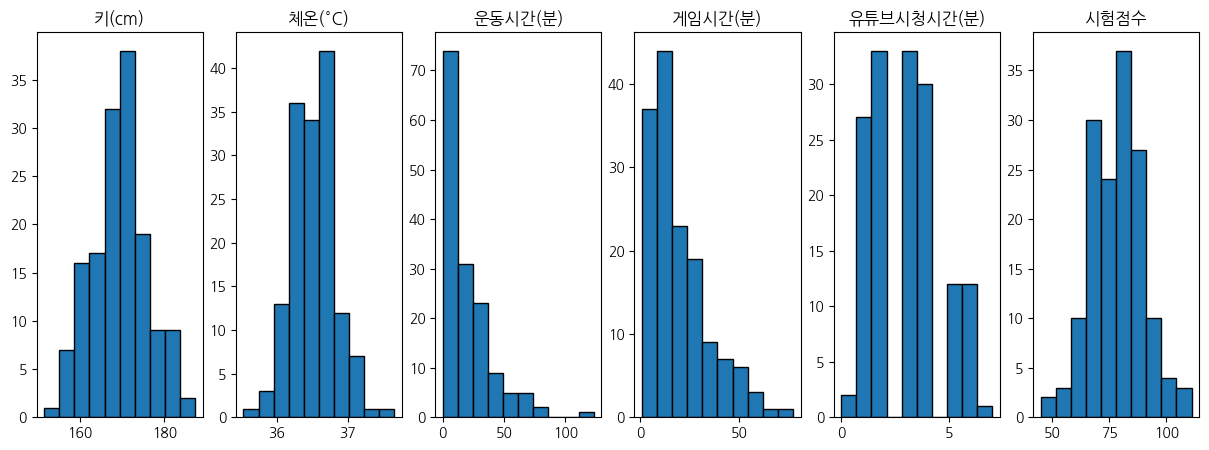

In [7]:
# 연속형 변수를 찾은 다음에 히스토그램 그려보기
import matplotlib.pyplot as plt
import koreanize_matplotlib

variables = ["키(cm)", "체온(°C)", "운동시간(분)", "게임시간(분)", "유튜브시청시간(분)", "시험점수"]

fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
for i, var in enumerate(variables) :
    ax[i].hist(data[var], edgecolor="black")
    ax[i].set_title(var)

```
uv add scipy
```

In [ ]:
from scipy.stats import shapiro

variables = ["키(cm)", "체온(°C)", "운동시간(분)", "게임시간(분)", "유튜브시청시간(분)", "시험점수"]

for i, var in enumerate(variables) :
    result = shapiro(data[var])
    print(result)
    print(f"{var} 정규성 검정 결과 p-value : {result[1]:.4f}")

# 유의수준 5% 하에서 ----- pvalue < 0.05
# 귀무가설(H0) : 정규분포를 따른다
# 대립가설(H1) : 정규분포를 따르지 않는다
# 만약에 pvalue < 0.05 이면 귀무가설을 기각한다 (= 대립가설을 채택한다)
# 결론 : 유의수준 5% 하에서 이 변수는 귀무가설을 기각하여 정규분포를 따르지 않는다
# (미션) 위에서 그린 그림과 함께 변수가 정규분포를 따르는지 결론을 작성해보자
# -> 키(cm), 체온(°C), 시험점수 가 p-value > 0.05 -> 귀무가설을 따른다 (정규분포)
# -> 그래프도 정규분포를 따른다

ShapiroResult(statistic=np.float64(0.9958013601422515), pvalue=np.float64(0.9478115310795381))
키(cm) 정규성 검정 결과 p-value : 0.9478
ShapiroResult(statistic=np.float64(0.9852952070629711), pvalue=np.float64(0.1116953655236208))
체온(°C) 정규성 검정 결과 p-value : 0.1117
ShapiroResult(statistic=np.float64(0.8214531107009067), pvalue=np.float64(3.042027497957974e-12))
운동시간(분) 정규성 검정 결과 p-value : 0.0000
ShapiroResult(statistic=np.float64(0.881865096741161), pvalue=np.float64(1.4136883662166838e-09))
게임시간(분) 정규성 검정 결과 p-value : 0.0000
ShapiroResult(statistic=np.float64(0.9366994624710727), pvalue=np.float64(2.9937861103593303e-06))
유튜브시청시간(분) 정규성 검정 결과 p-value : 0.0000
ShapiroResult(statistic=np.float64(0.9948505702914499), pvalue=np.float64(0.8772260778466701))
시험점수 정규성 검정 결과 p-value : 0.8772


# 2. 평균 검정

## 1) 독립표본 평균 검정

In [9]:
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


In [ ]:
## 독립 표본이란? 두 집단이 독립이다 ex. 언리얼반/AI반, 광고A/광고B
## <가정>
## 두 집단은 각각 정규분포를 따르는 연속형 데이터다
## 두 집단의 분산이 같은지 다른지 판단해야 한다
## <가설 설정>
## 귀무가설(H0) : 두 집단의 평균은 같다 (집단 A와 집단 B의 시험점수 평균이 같다)
## 대립가설(H1) : 두 집단의 평균은 같지 않다 (크다/작다) (집단 A와 집단 B의 시험점수 평균이 같지 않다)
from scipy.stats import levene, ttest_ind

group_A = data.loc[data["집단"] == "A", "시험점수"]
group_B = data.loc[data["집단"] == "B", "시험점수"]
print(f"Group A의 평균 : {group_A.mean()}")
print(f"Group B의 평균 : {group_B.mean()}")

# step1. 등분산 검정 (levene : 등분산인지 아닌지)
## 귀무가설(H0) : 두 집단은 등분산이다
## 대립가설(H1) : 등분산이 아니다
result = levene(group_A, group_B)
print(result)
equal_var = result[1] >= 0.05       # -> True

# step2. 독립표본 T-test (ttest_ind : 평균이 같은지 안같은지)
result = ttest_ind(group_A, group_B, equal_var=equal_var)   # equal_var(등분산인지 아닌지)를 넣어줘야 T-test 가능(지금은 True로 들어감)
print(result)
print(f"유의확률 p-value: {result[1]:.4f}")

Group A의 평균 : 76.23376623376623
Group B의 평균 : 80.78082191780823
LeveneResult(statistic=np.float64(2.381455012043491), pvalue=np.float64(0.12491865382161503))
TtestResult(statistic=np.float64(-2.480918742143134), pvalue=np.float64(0.014223859141825253), df=np.float64(148.0))
유의확률 p-value: 0.0142


## 2) 대응표본 평균 검정

In [15]:
# 대응표본 : 하나의 집단의 전/후 데이터 (ex. 다이어트 전/후, 시약투약 전/후)
## <가정>
## 각 집단은 각각 정규분포를 따르는 연속형 데이터다
## <가설 설정>
## 귀무가설(H0) : 집단의 전과 후는 차이가 없다 (전 - 후 = 0)
## 대립가설(H1) : 집단의 전과 후는 차이가 있다 (전 - 후 != 0)

import numpy as np
from scipy.stats import shapiro, ttest_rel
np.random.seed(42)

paired_data = pd.DataFrame({
    "운동 전" : np.random.normal(60, 5, 30),
    "운동 후" : np.random.normal(55, 5, 30)
})
paired_data["diff"] = paired_data["운동 후"] - paired_data["운동 전"]

# step1. 정규성 검정
# 귀무가설(H0) : 집단의 전과 후 차이(=diff)는 정규분포를 따른다
# 대립가설(H1) : 집단의 전과 후 차이(=diff)는 정규분포를 따르지 않는다
result = shapiro(paired_data["diff"])
print(result)

# step2. 대응표본 t_test
result = ttest_rel(paired_data["운동 전"], paired_data["운동 후"])
print(result)
print(f"대응표본 평균 검정 pvalue : {result[1]:.4f}")

ShapiroResult(statistic=np.float64(0.9640543377663393), pvalue=np.float64(0.3914622504470085))
TtestResult(statistic=np.float64(4.156919517876426), pvalue=np.float64(0.0002608579811022753), df=np.int64(29))
대응표본 평균 검정 pvalue : 0.0003


## 3) ANOVA 분석

In [11]:
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


In [ ]:
## <가정>
## 두 집단은 각각 정규분포를 따르는 연속형 데이터다
## 두 집단의 분산이 같은지 다른지 판단해야 한다
## <가설 설정>
## 귀무가설(H0) : 두 집단의 평균은 같다
## 대립가설(H1) : 두 집단의 평균은 같지 않다

from scipy.stats import levene, f_oneway

group_A = data.loc[data["집단_C"] == "A", "시험점수"]
group_B = data.loc[data["집단_C"] == "B", "시험점수"]
group_C = data.loc[data["집단_C"] == "C", "시험점수"]

print(f"집단 A의 시험 점수 평균 : {group_A.mean():.4f}")
print(f"집단 B의 시험 점수 평균 : {group_B.mean():.4f}")
print(f"집단 C의 시험 점수 평균 : {group_C.mean():.4f}")

# step1. 등분산 검정
result = levene(group_A, group_B, group_C)
print(result)

# step2. ANOVA (-> 등분산 검정에 통과해야 사용가능)
result = f_oneway(group_A, group_B, group_C)
print(result)
print(f"ANOVA 결과 pvalue = {result[1]:.4f}")

집단 A의 시험 점수 평균 : 72.6667
집단 B의 시험 점수 평균 : 73.4130
집단 C의 시험 점수 평균 : 91.5909
LeveneResult(statistic=np.float64(2.037219421019124), pvalue=np.float64(0.13405603086657428))
F_onewayResult(statistic=np.float64(91.70940064687885), pvalue=np.float64(1.4014089351972043e-26))
ANOVA 결과 pvalue = 0.0000


# 3. 독립성 검정

In [16]:
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


In [17]:
# 독립성 검정
# 두 개의 범주형 변수가 서로 독립인지 아닌지를 결정함
# 귀무가설(H0) : 두 변수는 서로 독립이다
# 대립가설(H1) : 두 변수는 서로 독립이 아니다

from scipy.stats import chi2_contingency

cross_data = pd.crosstab(data["성별"], data["흡연여부"])
cross_data

흡연여부,비흡연,흡연
성별,,
남,40,31
여,44,35


In [20]:
results = chi2_contingency(cross_data)
print(results)
print(f"범주형 변수 독립성 검정 pvalue : {results[1]}")
expected_data = pd.DataFrame(results[-1], index=cross_data.index, columns=cross_data.columns)
expected_data

Chi2ContingencyResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), dof=1, expected_freq=array([[39.76, 31.24],
       [44.24, 34.76]]))
범주형 변수 독립성 검정 pvalue : 1.0


흡연여부,비흡연,흡연
성별,,
남,39.76,31.24
여,44.24,34.76


[검정]
- 귀무가설(H0)
- 대립가설(H1)
- statistics, p-value

p-value < 0.05(=유의수준)   ---> 유의수준 5%하에서 귀무가설을 기각합니다

1. 정규성 검정  
    H0 : 정규분포를 따른다  
    H1 : 정규분포를 따르지 않는다  
    shapiro (소규모 데이터에 유리)

2. 평균 검정
    1) 독립표본 T-test  
    - step1. 등분산 검정 
    H0 : 집단 A, B의 분산이 같다  
    H1 : 집단 A, B의 분산이 같지 않다  
    levene(A,B)  
    H0 : 집단 A, B의 평균은 같다  
    H1 : 집단 A, B의 평균은 같지 않다  
    ttest_ind(A, B, equeal_var = ?)

3. 독립성 검정

In [21]:
# 검정
# 귀무가설(H0)
# 대립가설(H1)
# statistics, p-value
# p-value < 0.05(=유의수준)
# -----> 유의수준 5%하에서 귀무가설을 기각합니다.

# 1. 정규성 검정
# H0: 정규분포를 따른다
# H1: 정규분포를 따르지 않는다. 
# shapiro(소규모 데이터에 유리)
# 2. 평균 검정
# 1) 독립표본 T-test 
# # Step1. 등분산 검정
# H0: 집단 A, B의 분산이 같다
# H1: 집단 A, B의 분산이 같지 않다. 
# levene(A, B)
# # Step2. 독립표본 T-test
# H0: 집단 A, B의 평균은 같다
# H1: 집단 A, B의 평균은 같지 않다. 
# ttest_ind(A, B, equal_var=?)
# 2) 대응표본 T-test
# H0: 전과 후의 차이가 없다.(전-후 = 0)
# H1: 전과 후의 차이가 있다.(전-후 != 0)
# diff = 전 - 후
# ttest_rel(diff)
# 3) ANOVA
# # Step1. 등분산 검정
# H0: 집단 A, B, C의 분산이 같다
# H1: 집단 A, B, C의 분산이 같지 않다. 
# levene(A, B, C)
# # Step2. ANOVA 분석
# H0: 집단 A, B, C의 평균이 같다.
# H1: 집단 A, B, C의 평균이 같지 않다.
# f_oneway(A, B, C)
# 3. 독립성 검정
# 범주형 데이터 두 집단이 독립인가 아닌가 판단
# H0: 두 집단이 서로 독립이다.
# H1: 두 집단이 서로 독립이 아니다. 
# 교차표(cross_data) = pd.crosstab()
# chi2_contingency(cross_data)
# expected_data